<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/3_3_Recycling_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
states = ["high", "low"]
actions = {
    "high": ["wait", "search"],
    "low": ["wait", "search", "recharge"]
}

a = 0.9
b = 0.7
r_search = 2
r_wait = 0.5
r_rescue = -3
r_recharge = 0

#State to state outline -->
transitions = {
    ("high","search"): [("high", a, r_search), ("low", 1-a, r_search)],
    ("high", "wait"): [("high", 1.0, r_wait)],
    ("low", "search"): [("low", b, r_search), ("high", 1-b, r_rescue)],
    ("low", "wait"): [("low", 1.0, r_wait)],
    ("low", "recharge"): [("high", 1.0, r_recharge)]
}

import pandas as pd
results = pd.DataFrame()

def optimizer(states, actions, transitions, episodes, g, t = 0.001):

  V = {s: 0 for s in states}
  policy = {s: None for s in states}

  results = [[],[],[],[]]

  for i in range(1,episodes+1):
    d = 0
    for s in states:
      actValues = {}
      for a in actions[s]:
        sum = 0
        for (s_next, prob, reward) in transitions[(s, a)]:
          sum += prob * (reward + g * V[s_next])
        actValues[a] = sum
      maxAct = max(actValues, key = actValues.get)
      d = max(d, abs(V[s] - actValues[maxAct]))
      V[s] = actValues[maxAct]
      policy[s] = maxAct
      if(s=="high"):
        results[0].append(i)
        results[1].append(V[s])
      if(s=="low"):
        results[2].append(i)
        results[3].append(V[s])

  return V, policy, results

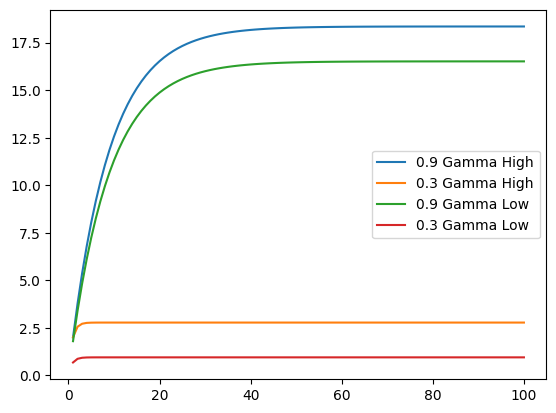

In [ ]:
#For function: (list states, dict actions, dict transitions, episodes, gamma)
V1, policy1, results1 = optimizer(states, actions, transitions, 100, 0.9)
V2, policy2, results2 = optimizer(states, actions, transitions, 100, 0.3)

#Graphs of "high"  and "low" results
import matplotlib.pyplot as plt

x11 = results1[0]
x12 = results2[0]
y11 = results1[1]
y12 = results2[1]

plt.plot(x11, y11, label = "0.9 Gamma High")
plt.plot(x12, y12, label = "0.3 Gamma High")

x21 = results1[2]
x22 = results2[2]
y21 = results1[3]
y22 = results2[3]

plt.plot(x21, y21, label = "0.9 Gamma Low")
plt.plot(x22, y22, label = "0.3 Gamma Low")

plt.legend()